In [90]:
import numpy as np
import math
import matplotlib.pyplot as plt
# Define the function
def f(x,t):
    return x

In [91]:
# function for single step of euler 
def euler_solve_step(f,h,t,x):
    x = x + h*f(x,t)
    return  x

In [92]:
# function for single step of rk4
def rk4_solve_step(f,h,t,x):
    k1 = f(x,t)
    k2 = f( x + h*(k1/2),t + h/2)
    k3 = f( x + h*(k2/2),t + h/2)
    k4 = f( x +h*k3,t + h)
    return  x + (1/6)*h*(k1 + 2*k2 + 2*k3 + k4)

In [93]:
# function to solve steps
def solve_to(f,h,t,x,T,solver):
    while t+h < T:
        x=solver(f,h,t,x)
        t = t + h
    if T!=t:
        x=solver(f,T-t,t,x)
        t = T
    return x

In [94]:
# function to solve the ode
def solve_ode(f,h,t,x,L,solver):
    m = []
    for l in L:
        x = solve_to(f,h,t,x,l,solver)
        t=l
        m.append(x)
    error = abs(math.exp(l)-x)
    return m, error


In [95]:
solve_to(f,0.1,0,1,1,rk4_solve_step)

2.7182797441351663

In [96]:
solve_ode(f,0.1,0,1,[0.1,0.6,1],euler_solve_step)

([1.1, 1.7715610000000002, 2.5937424601000005], 0.12453936835904456)

Text(0, 0.5, 'error')

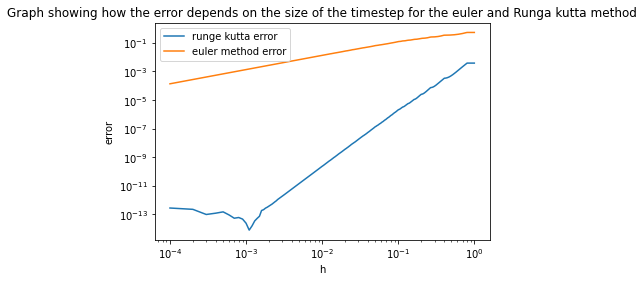

In [105]:
#Produce a plot with double logarithmic scale showing how the error depends on the size of the timestep 
error_euler = []
error_runga = []
for h in np.arange(0.0001,1,0.0001):
    [a,b]= solve_ode(f,h,0,1,[0.1,0.9,1],euler_solve_step)
    [i,j]= solve_ode(f,h,0,1,[0.1,0.9,1],rk4_solve_step)
    error_euler.append(b)
    error_runga.append(j)

plt.loglog(np.arange(0.0001,1,0.0001), error_runga)
plt.loglog(np.arange(0.0001,1,0.0001), error_euler)
plt.legend(['runge kutta error','euler method error'])
plt.title('Graph showing how the error depends on the size of the timestep for the euler and Runga kutta method')
plt.xlabel('h')
plt.ylabel('error')
